## This is the first practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directly and most importantly - 
<span style="color:blue">have fun</span>.

**Topic**: ML frameworks, data preprocessing

**To submit**: New version of the notebook, with your code. 

## ML frameworks:
### - Tensorflow
### - High level tensorflow (aka Keras)
### - Pytorch
### - Other dead frameworks

![image.png](https://cv-tricks.com/wp-content/uploads/2018/05/Karpathy-Pytorch-Tweet.png)

Please finish the folowing tutorials to get familiar with pytorch (we will use it later in course):
- https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Important part of Pytorch training cycle is Dataset class, which provides way to load data into your model. 

In [ ]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 90kB/s 


In [ ]:
!pip install torch===1.5.1 torchvision===0.6.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 753.2MB 24kB/s 
     |████████████████████████████████| 6.6MB 17.9MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np


For example particular (although not very usefull)  implementation to load number. 

In [ ]:
class MyNumberDataset(Dataset):
    """
    Return numbers from given range
    """
    def __init__(self,min_number=0,max_number=100):
        self.numbers = np.arange(min_number,max_number)
        pass
    
    def __len__(self):
        return len(self.numbers)
    
    def __getitem__(self, index):
        return torch.tensor(self.numbers[index])

my_dataset = MyNumberDataset(0,10)
print(my_dataset[0])
print(my_dataset[5])

tensor(0)
tensor(5)


### Two kinds of data preprocessing:
#### - Transforms - Invariant preprocessing always applied to image (for example, noise reduction, convertion to proper size)
#### - Augmentations - Probabilistic changes, used in training to add variation to images. 
#### let's see how they work

https://albumentations.readthedocs.io/en/latest/examples.html

In [ ]:
!pip install albumentations

     |████████████████████████████████| 634kB 2.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=dbeba5e94a98fdae90732d99592a1227b62cbe13de4b496f50f376d213d0a248
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pydicom 
from matplotlib import pyplot as plt
from albumentations import (
    HorizontalFlip, VerticalFlip, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
     GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

path = '/content/drive/My Drive/Sirius 2020/data/'
dicom_example = pydicom.read_file(path +"IM_00020_ano.dcm")
img = dicom_example.pixel_array.copy()
img = ((img-img.min()) / (img.max()-img.min()) * 255).astype(np.uint8)

transforms = Compose([VerticalFlip(),GridDistortion(distort_limit=1),MotionBlur(blur_limit=10,p=1)])

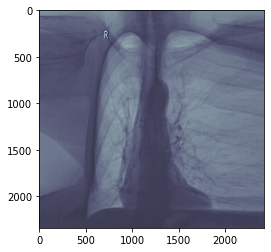

In [ ]:
transformed = transforms(image=img)['image']
#Each time you run this cell you will get different result
plt.imshow(transformed,cmap="bone")
# plt.imshow(img, cmap='bone')
plt.show()

## **Task 1:**
- Theory: It's great to have convinient dataset class to train your model. 
- Given: Images from data\MedMnist folder
- Do: Create dataset class, which supports transformations. Use folder names to create classes.  


In [ ]:
import os
import sys
import torch
from torch.utils.data import Dataset
import numpy as np
import imageio
class MyDataset(Dataset):
    """
    path = '/content/drive/My Drive/MedMNIST/MedMnist'
    """
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        classNames = os.listdir(self.path)
        imagesFiles = []
        for i in range(len(classNames)):
            for x in os.listdir(os.path.join(self.path, classNames[i])):
                imagesFiles.append([os.path.join(self.path, classNames[i], x), classNames[i]])

        self.image_list = imagesFiles

    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, index):
        # classNames = os.listdir(self.path)
        # imagesFiles = []
        # for i in range(len(classNames)):
        #     for x in os.listdir(os.path.join(self.path, classNames[i])):
        #         # imagesFiles.append([os.path.join(self.path, classNames[i], x), classNames[i]])
        #         imagesFiles.append([os.path.join(self.path, classNames[i], x), classNames[i]])
        img_path = self.image_list[index][0]
        img_class = self.image_list[index][1]

        img = imageio.imread(img_path)

        if self.transform:
            img = self.transform(image=img)
            
        return (img, img_class)

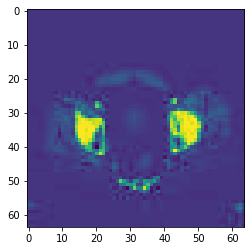

In [ ]:
plt.imshow(img1[0]['image'], cmap='bone') # transforms applied
# plt.imshow(img1[0]) #use it when transforms not applied